In [1]:
import pandas as pd

In [2]:
!ls data

20210518_checks.csv	20210518_uplift.csv  20210521_sample_submission.csv
20210518_hierarchy.csv	20210521_offers.csv


In [3]:
checks = pd.read_csv('data/20210518_checks.csv', parse_dates=['day', 'time'])
checks.sample(10)

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,region_name
16462507,46445043700e7d798b8f8110629fb0aa,2020-06-16,fbc01d515dac182ba3524a3b11fdf4b2,c3be36bf7dbf9383d693aa31580f717a,2021-06-05 19:45:05,b57533849853c4d237ff95449ba533f4,c03455bab6a74485fc808f6980e39eba,17,1.000,41.58,54.99,7e35e74e610188414ad24235dd787c78
5320881,49799898565d3f8c14178cf656e9fd40,2020-01-26,b26747fc8cb2170baa866b315cf58b7c,32c91689c0c864dcc7589d5726cba47c,2021-06-05 14:05:55,9ea70645e4560faa2dac096f938bf36a,7215ee9c7d9dc229d2921a40e899ec5f,9,1.000,6.75,18.99,152f1b77a32508570e2745daf9ce7aec
6455449,efa4565a8eabee2fed18e2630c54afcb,2020-08-29,785ee201dc63daae3aecb2c7cbae60d3,940008a617456d85b5a8d1aeb3146c25,2021-06-05 11:57:05,370454d4b3fab691772137d3dd33bfdc,a7b58b12eda099fa85e555f0ac0f1761,4,1.000,74.03,90.99,7e35e74e610188414ad24235dd787c78
7784998,cfeeab7cec7f3f09a816c39ec8e939ac,2019-10-20,adeb12111c95807557664efbf3b746ae,d4a2e6eb9d1b8a747c149a19a60ee9ed,2021-06-05 16:47:40,8d1499bedfdb36775396e6ff0e003ead,7215ee9c7d9dc229d2921a40e899ec5f,5,0.256,28.47,56.83,7e35e74e610188414ad24235dd787c78
6355509,3e769ddbfce00ed18989d062f8aab29e,2020-09-05,9061198a99f995e44314503d643e49a8,1e2f61eee4d722d3f8e5c7c8e2709c3e,2021-06-05 11:38:54,7d59b663190e8395626391608891a02d,542626c639e3ae0946a17091669fe781,8,1.000,56.83,68.99,7e35e74e610188414ad24235dd787c78
12374645,6f7d0ff2a2227fe966a993dce02ec179,2020-08-31,147768d3955e38c4e662c0a95d807abc,7ced373f6820e6dfb1ca4a33b2c9cf49,2021-06-05 18:07:13,6cfcaf43bff88d5d645436f640ec735c,7215ee9c7d9dc229d2921a40e899ec5f,3,2.460,205.02,293.85,152f1b77a32508570e2745daf9ce7aec
134276,4dae4951345a21508e2fc0e23909a50c,2019-12-29,6a2095bc178dbb0ba00e8fd5f10306b2,e924825aaf6959ce15c2640eb4aa7d7a,2021-06-05 17:16:08,2dd86d3f7a668e7d98b8aa6b363a01fd,fa552f6de867833d3bf8c0c7bf60c313,20,2.000,37.54,73.98,7e35e74e610188414ad24235dd787c78
5930605,ed13f4be235c4cc72539a604d99f37bc,2019-10-26,c0279f73075a52e1a7dea35065bc8c80,eaea256b1fe12a2459ce42c620beef3f,2021-06-05 18:38:22,b3f5c68d27b4cc0a82ce413b6e0082b9,fbd8c08867787fe56fe756aef6ed34e9,4,2.000,212.19,239.98,152f1b77a32508570e2745daf9ce7aec
5718506,720967d9cc1251422ec22171d580fd84,2020-06-05,d39934ce111a864abf40391f3da9cdf5,8cd388785d9d9945b99b1035405eaad8,2021-06-05 09:00:55,5feaf32e3bb9ddcda42898ac9739fc8b,7215ee9c7d9dc229d2921a40e899ec5f,7,1.788,65.90,116.21,152f1b77a32508570e2745daf9ce7aec
6349831,88bca8d5ae196d1e06ed655010389734,2020-09-05,0e0b24fc303d2b384be5a2464654a5d2,6068f34a67dcb80a4fd921e366571486,2021-06-05 16:59:43,9f2d31c46c3fc0af4430d70f9531d45f,0195aae8fc37bdd6e95a54c6e99c4505,1,1.000,43.64,58.98,7e35e74e610188414ad24235dd787c78


In [4]:
checks = checks.rename({'selling_price': 'sales', 'supplier_price': 'supplier_sales'}, axis=1)

In [5]:
checks['retail_price'] = checks['sales'] / checks['num_sales']
checks['supplier_price'] = checks['supplier_sales'] / checks['num_sales']

In [6]:
import seaborn
seaborn.set()

In [7]:
checks.groupby('sku').agg({'sales': 'sum'}).sort_values('sales', ascending=False).head(30)

,sales
sku,
7a8675a8f6988ebcbefd062fabaccc85,2.014070e+07
ef7bf412117548cb80b3f3b33a12977d,1.804391e+07
753e100607ecf3e68098739b81e0a645,1.570696e+07
6278f48a43fb0a23036b3a11c92e726c,1.344623e+07
119a9ea3a832472e1c163e5c1afba59e,1.104050e+07
c8ac520562ba934dd67cbf0f060c4252,8.908282e+06
33306ccd877e73c388652739869d3dc7,7.282475e+06
d50b11b02e15deace91e3b4602a78c5d,6.263543e+06
1accaece89aad30aeab8ee5a72a2ecf0,5.684276e+06


<AxesSubplot:xlabel='day'>

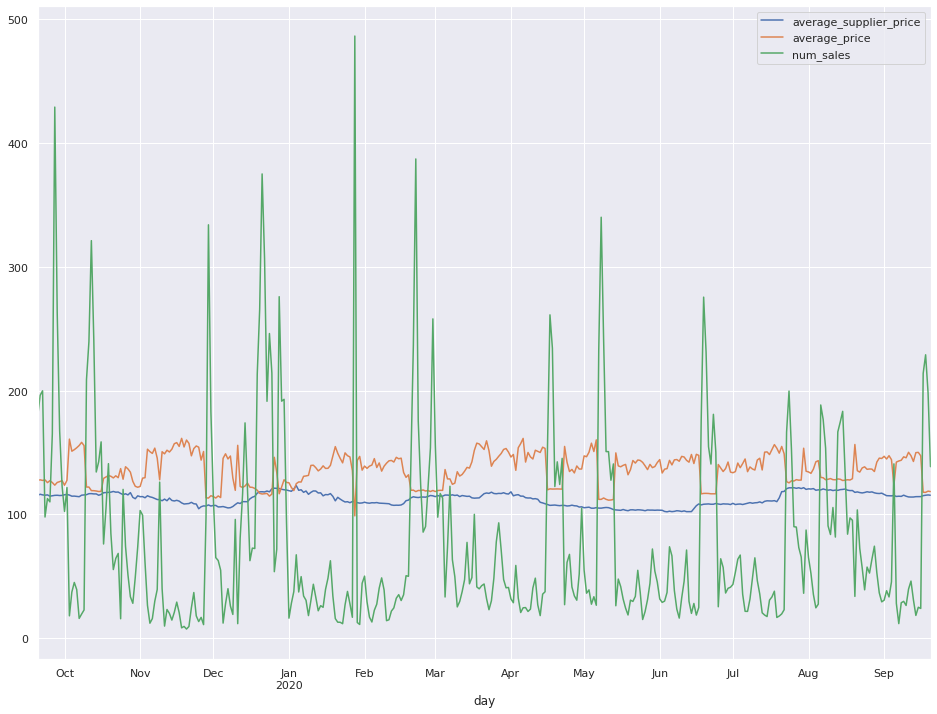

In [8]:

%matplotlib inline

sales = checks[checks.sku == 'ef7bf412117548cb80b3f3b33a12977d'].groupby(['day']).agg({
    'sales': 'sum',
    'supplier_sales': 'sum',
    'num_sales': 'sum',
})
sales['average_price'] = sales['sales'] / sales['num_sales']
sales['average_supplier_price'] = sales['supplier_sales'] / sales['num_sales']
sales['num_sales'] /= 5
sales[['average_supplier_price', 'average_price', 'num_sales']].plot(figsize=(16, 12))

In [9]:
uplift = pd.read_csv('data/20210518_uplift.csv')
uplift.sample(10)

,Offer_ID,UpLift
371,637,8.690918
58,B52,11.339725
529,F96,0.401636
461,B5,0.825192
293,B123,21.791548
252,557,0.443796
54,B37,6.164263
523,F99,0.694265
303,B120,0.811516
139,450,1.000414


In [10]:
submission = pd.read_csv('data/20210521_sample_submission.csv')
submission

,Offer_ID,UpLift
0,386,0
1,182,0
2,173,0
3,375,0
4,379,0
...,...,...
144,536,0
145,99,0
146,100,0
147,95,0


In [11]:
hierarchy = pd.read_csv('data/20210518_hierarchy.csv')
hierarchy.sample(10)

,sku,hierarchy_level1,hierarchy_level2,hierarchy_level3,hierarchy_level4
75114,4e7db50bc297d5c451990aa1510db642,44a7b825383402ed937a15fb8a5bb12a,ea5d2f1c4608232e07d3aa3d998e5135,99cad265a1768cc2dd013f0e740300ae,b02ece95d7615f1b007e29a316cd7292
46249,15bb2bc9ee42a9ec3a68260ca03dc06e,cc9284597026dcc021735c0970ca0c93,02e74f10e0327ad868d138f2b4fdd6f0,df0e09d6f25a15a815563df9827f48fa,b09aaa6cc12c35bf4b00675f4c79a69a
50866,6d59b803f2ea28e24c175ed133c782d8,44a7b825383402ed937a15fb8a5bb12a,66f041e16a60928b05a7e228a89c3799,5a29503a4909fcade36b1823e7cebcf5,3c99602e86b44dab30feedee107a4705
12120,f6ae52a3684e55577598fef0fcffb83b,cc9284597026dcc021735c0970ca0c93,67c6a1e7ce56d3d6fa748ab6d9af3fd7,daad8d509446c856e52d79f897232876,2a62e95b4eaca4b9b02d45b301fe7ba7
43049,92eecc45f7dc1d51321dec530f40f53d,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,4aec1b3435c52abbdf8334ea0e7141e0,fc7bf47d5bba972e78eb9deab432d721
52351,08f762b2b797a1e097a43f0af75d72b5,44a7b825383402ed937a15fb8a5bb12a,ea5d2f1c4608232e07d3aa3d998e5135,90365351ccc7437a1309dc64e4db32a3,3a51859f37130e75a0aa2d3e1ee30da3
31461,79a5e81c524aee9110e6b6a93fc35c39,44a7b825383402ed937a15fb8a5bb12a,14bfa6bb14875e45bba028a21ed38046,0db2e204010400f5c506620adcd1ae68,3de0910948020b321efa3d64c9c766ac
6692,3e7230ea48640e437d03e558ca4aeccb,44a7b825383402ed937a15fb8a5bb12a,3295c76acbf4caaed33c36b1b5fc2cb1,bea6cfd50b4f5e3c735a972cf0eb8450,d99849f391288aff6dd8abacfaa50bcd
58136,5f4f5e6ff7b76b48a0543439fc0e1864,cc9284597026dcc021735c0970ca0c93,c16a5320fa475530d9583c34fd356ef5,c5d9256689c43036581f781c61f26e50,21f6bf567036bfe517e11a0f795c67e7
71278,47cf0a80934fa52b55b66c0d90d091c3,cc9284597026dcc021735c0970ca0c93,19ca14e7ea6328a42e0eb13d585e4c22,c254e7753095807e1cca159e48eceb21,c0647abcf66986c120b3d2d3e08bc712


In [12]:
offers = pd.read_csv('data/20210521_offers.csv', parse_dates=['start_date', 'end_date'])
offers

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train
1,Facades,F2,e87788b585ead792a4d40f7de18f2f76,2020-01-02,2020-01-08,train
2,Facades,F9,5ae92b5e465d630285677e80b43fe5f7,2020-01-16,2020-01-22,train
3,Facades,F45,0790b472112a765339f0e5c3f66816ee,2020-03-19,2020-03-25,train
4,Facades,F191,e87788b585ead792a4d40f7de18f2f76,2020-11-12,2020-11-18,test
...,...,...,...,...,...,...
9771,Biweekly,683,0f368be7897dd1531e43dc37115eeaf0,2019-11-14,2019-11-27,train
9772,Biweekly,691,47c28bf957fe120f2d016e46911e5bdb,2019-11-14,2019-11-27,train
9773,Biweekly,683,00432d021eca6059fee2ed69a732c2b2,2019-11-14,2019-11-27,train
9774,Biweekly,690,40d78b3648a4ea15f300070a0ffd9752,2019-11-14,2019-11-27,train


In [13]:
submission['UpLift'] = uplift['UpLift'].median()

In [14]:
submission.to_csv('submissions/submission_median.csv.zip', index=False, compression='zip')

In [15]:
uplift.shape

(740, 2)

In [16]:
submission.shape

(149, 2)

In [17]:
sales = checks.groupby(['sku', 'day']).agg({'sales': 'sum'})
sku_importance = sales.groupby('sku').agg({'sales': 'sum'}).rank(ascending=False)
sku_importance = sku_importance.rename({'sales': 'sku_rank'}, axis=1)
sku_importance.sku_rank.sort_values().head(50)

sku
7a8675a8f6988ebcbefd062fabaccc85     1.0
ef7bf412117548cb80b3f3b33a12977d     2.0
753e100607ecf3e68098739b81e0a645     3.0
6278f48a43fb0a23036b3a11c92e726c     4.0
119a9ea3a832472e1c163e5c1afba59e     5.0
c8ac520562ba934dd67cbf0f060c4252     6.0
33306ccd877e73c388652739869d3dc7     7.0
d50b11b02e15deace91e3b4602a78c5d     8.0
1accaece89aad30aeab8ee5a72a2ecf0     9.0
911d7361089a37c2a6488a548b4f06a8    10.0
767aaeb00eb1c7dd273ba954b3e2f4b8    11.0
5a008f40c57611feda53dbd9935e7189    12.0
ca544f2ea6030dae031adc5a72dde275    13.0
1cbaaeb2212bbbe9d458ca9b81d74db7    14.0
441f83db20dab8cbdd080b53307836e2    15.0
8f4b2b5d481140b01c5b20bbf493b2b9    16.0
142d63107737a448dc2dfe2dcd0154b8    17.0
6cfcaf43bff88d5d645436f640ec735c    18.0
d6b917615b32dcbbd0e78c10428d208a    19.0
ab32d6b6cbb1ad526aaf3e22914644ec    20.0
bff9e04e1b854068f51e10b18482008e    21.0
5203102c86af0924829cb4d79c7f160b    22.0
c8360c69412cccd193751f246e3beb79    23.0
452a845d0d1d57e27aa080fd7c952eea    24.0
eb23a7cc9c97

In [18]:
offers = offers.merge(sku_importance, on='sku', how='left')

In [19]:
offer_grouped = offers.groupby('Offer_ID').agg({
    'Promo_type': 'first',
    'sku': list,
    'start_date': 'first',
    'end_date': 'first',
    'train_test_group': 'first',
    'sku_rank': list,
})

In [20]:
offer_grouped['weekday'] = offer_grouped.start_date.apply(lambda x: x.weekday())
offer_grouped['weekday'].value_counts()

3    634
1    215
0     25
4     14
2      1
Name: weekday, dtype: int64

In [21]:
offer_grouped['length'] = (offer_grouped.end_date - offer_grouped.start_date).apply(lambda x: 1 + x.days)
offer_grouped['length'].value_counts()

14    414
7     309
21     66
28     30
22     18
20      9
29      8
42      7
15      7
36      5
11      5
43      4
49      3
8       1
10      1
6       1
4       1
Name: length, dtype: int64

In [22]:
offer_grouped['sku_count'] = offer_grouped['sku'].apply(len)

In [23]:
import numpy as np 

rank_features = []
for offer_index, offer in offer_grouped.iterrows():
    sku_list = list(zip(offer['sku_rank'], offer['sku']))
    best_sku_rank, best_sku = min(sku_list)
    worst_sku_rank, _ = max(sku_list)
    sku_rank_sum = sum([1.0 / rank for rank in offer['sku_rank']])
    median_sku_rank = np.median([rank for rank in offer['sku_rank']])

    rank_features.append({
        'best_sku_rank': best_sku_rank,
        'worst_sku_rank': worst_sku_rank,
        'best_sku': best_sku,
        'sku_rank_sum': sku_rank_sum,
        'median_sku': median_sku_rank,
    })
    
rank_features = pd.DataFrame(rank_features, index=offer_grouped.index)
rank_features

,best_sku_rank,worst_sku_rank,best_sku,sku_rank_sum,median_sku
Offer_ID,,,,,
10,1595.0,13540.0,1f24b678deda0ec059c12a327eba8ca9,0.001746,5912.5
100,1214.0,50969.0,bc09c49e4c2493077483b6118765a1ae,0.002272,9802.5
101,438.0,438.0,8eed281d2cf9467fa01a952642fe7545,0.002283,438.0
102,483.0,4248.0,161c912521dac7c19d567460ccd13932,0.007070,2305.0
103,677.0,677.0,87ac83221a74e6708a5c5d9e597d779d,0.001477,677.0
...,...,...,...,...,...
F95,238.0,238.0,ffd8add73dc2a988b86048356b1b33a2,0.004202,238.0
F96,690.0,42069.0,5eae0d49ba8de4c0d555341e2e040d4a,0.006843,11696.5
F97,10704.0,24784.0,55ab9a9c4f7e8262ec600218304f50a6,0.000875,16589.0


In [24]:
offer_grouped = pd.concat([offer_grouped, rank_features], axis=1)

In [25]:
offer_grouped.columns

Index(['Promo_type', 'sku', 'start_date', 'end_date', 'train_test_group',
       'sku_rank', 'weekday', 'length', 'sku_count', 'best_sku_rank',
       'worst_sku_rank', 'best_sku', 'sku_rank_sum', 'median_sku'],
      dtype='object')

In [26]:
from catboost import CatBoostRegressor

In [27]:
model = CatBoostRegressor(loss_function='MAE')

In [40]:
features = ['Promo_type', 'weekday', 'length', 'sku_count', 'best_sku_rank', 'worst_sku_rank', 'median_sku']
target = 'UpLift'
categorical_features = ['Promo_type', 'weekday', 'best_sku']
categorical_features = [f for f in categorical_features if f in features]

In [41]:
offer_grouped[categorical_features] = offer_grouped[categorical_features].astype('category')

In [42]:
train_Xy = offer_grouped.merge(uplift, on='Offer_ID')

In [43]:
model.fit(train_Xy[features], train_Xy[target], cat_features=categorical_features, metric_period=100)

0:	learn: 4.3041723	total: 3.89ms	remaining: 3.89s
100:	learn: 3.5744930	total: 207ms	remaining: 1.84s
200:	learn: 3.3907793	total: 386ms	remaining: 1.53s
300:	learn: 3.2214318	total: 587ms	remaining: 1.36s
400:	learn: 2.9974496	total: 852ms	remaining: 1.27s
500:	learn: 2.8757636	total: 1.08s	remaining: 1.08s
600:	learn: 2.7762247	total: 1.3s	remaining: 862ms
700:	learn: 2.6858619	total: 1.52s	remaining: 649ms
800:	learn: 2.6165328	total: 1.74s	remaining: 431ms
900:	learn: 2.5644789	total: 1.95s	remaining: 214ms
999:	learn: 2.5046024	total: 2.17s	remaining: 0us


In [44]:
submission['order'] = range(submission.shape[0])

In [45]:
test_Xy = offer_grouped.merge(submission, on='Offer_ID')

In [46]:
test_Xy[target] = model.predict(test_Xy[features])

In [47]:
submission_predict = test_Xy.sort_values('order')[['Offer_ID', target]]

In [48]:
submission_predict.sample(100, random_state=0)

,Offer_ID,UpLift
11,229,5.602049
24,322,1.305526
109,F178,1.141895
114,F183,8.133818
34,381,6.403442
...,...,...
16,234,2.749823
5,176,5.797825
87,B88,0.425190
65,63,1.723359


In [ ]:
build_dataset

In [49]:
name = 'offer_sku_clip'
submission_predict.to_csv(f'submissions/{name}.csv', index=False)
submission_predict.to_csv(f'submissions/{name}.csv.zip', index=False, compression='zip')

In [50]:
submission_predict

,Offer_ID,UpLift
37,386,12.959254
9,182,3.538865
2,173,7.514241
28,375,4.421044
32,379,5.000395
...,...,...
57,536,5.644284
73,99,1.068707
0,100,1.925136
69,95,7.091044


In [51]:
sorted(zip(model.get_feature_importance(), features))

[(6.714279167263803, 'length'),
 (10.125128634378514, 'weekday'),
 (12.739734040286123, 'worst_sku_rank'),
 (13.604717565047242, 'sku_count'),
 (15.875439132247203, 'Promo_type'),
 (17.76703559288548, 'median_sku'),
 (23.17366586789163, 'best_sku_rank')]

<AxesSubplot:>

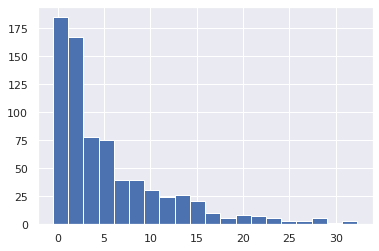

In [54]:
uplift.UpLift.hist(bins=20)

<AxesSubplot:>

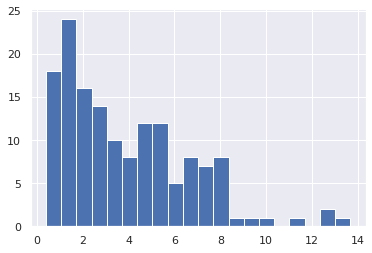

In [53]:
submission_predict.UpLift.hist(bins=20)